In [1]:
# importing nacessary libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the .pkl file which containes the list of features required
df = pd.read_pickle("merged_all_table.pkl", compression='bz2')

In [3]:
# checking the shape of the data
df.shape

(25979, 66)

In [4]:
# checking for null values
df.isna().sum()

match_api_id                            0
goal                                11762
shoton                              11762
shotoff                             11762
foulcommit                          11762
card                                11762
cross                               11762
corner                              11762
possession                          11762
B365H                                3387
B365D                                3387
B365A                                3387
BWH                                  3404
BWD                                  3404
BWA                                  3404
IWH                                  3459
IWD                                  3459
IWA                                  3459
LBH                                  3423
LBD                                  3423
LBA                                  3423
PSH                                 14811
PSD                                 14811
PSA                               

# Preprocessing

In [5]:
# creating a deep copy of match 
match_df = df.copy()

In [6]:
match_df.columns

Index(['match_api_id', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'league_name', 'country_name',
       'team_api_id', 'team_long_name', 'team_short_name',
       'team_overall_score', 'home_total_goal', 'away_total_goal',
       'home_players_avg_overall_rating', 'home_players_avg_overall_score',
       'home_players_avg_ideal_body_rate', 'away_players_avg_overall_rating',
       'away_players_avg_overall_score', 'away_players_avg_ideal_body_rate',
       'home_total_win', 'home_total_loose', 'home_total_draw',
       'away_total_win', 'away_total_loose', 'away_total_draw',
       'league_home_total_win', 'league_home_total_loose',
       'league_home_total_draw', 'league_away_total_win',
       'league_a

In [7]:
# #droping some columns
# cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
#                'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
#                'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
#                'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
#                'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
#                'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
#                'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
#                'possession','season', 'stage', 'date','country_name', 'league_name','season','stage','date',"goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession"]
# match_df.drop(columns=cols_to_drop, inplace = True)

# before removing bets
cols_to_drop =['match_api_id' ,'PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA',
               'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
               'country_name', 'league_name', 'team_long_name', 'team_short_name', 'team_api_id']
match_df.drop(columns=cols_to_drop, inplace = True)

# removing bets too
# cols_to_drop =['match_api_id' , 'B365H', 'B365D', 'B365A', 'BWH',
#                 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
#                 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
#                 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'team_api_id',
#                'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
#                'country_name', 'league_name', 'team_long_name', 'team_short_name']
# match_df.drop(columns=cols_to_drop, inplace = True)

In [8]:
# shape after dropping columns
match_df.shape

(25979, 43)

In [9]:
# creating input and output for the model
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [10]:
# input shape
X.shape

(25979, 42)

In [11]:
# checking for data types
X.dtypes

B365H                               float64
B365D                               float64
B365A                               float64
BWH                                 float64
BWD                                 float64
BWA                                 float64
IWH                                 float64
IWD                                 float64
IWA                                 float64
LBH                                 float64
LBD                                 float64
LBA                                 float64
WHH                                 float64
WHD                                 float64
WHA                                 float64
SJH                                 float64
SJD                                 float64
SJA                                 float64
VCH                                 float64
VCD                                 float64
VCA                                 float64
team_overall_score                  float64
home_total_goal                 

## Handling Missing Values

In [12]:
# handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

d:\college\sem 3\project requirement gathering\Football-Prediction\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    # SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.5378961013172938

Classifier: DecisionTreeClassifier
Accuracy: 0.4144506731690402

Classifier: GaussianNB
Accuracy: 0.40555811422275667

Classifier: RandomForestClassifier
Accuracy: 0.494130837299144

Classifier: XGBClassifier
Accuracy: 0.4945542176887382

Classifier: LGBMClassifier
Accuracy: 0.5068717329759103



In [132]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

# with bets
# Classifier: LogisticRegression
# Accuracy: 0.5321219921150571

# Classifier: DecisionTreeClassifier
# Accuracy: 0.3985523698173097

# Classifier: GaussianNB
# Accuracy: 0.3997069041781603

# Classifier: SVC
# Accuracy: 0.5260017070953372

# Classifier: RandomForestClassifier
# Accuracy: 0.49928845836102553

# Classifier: XGBClassifier
# Accuracy: 0.48962709154372847

# Classifier: LGBMClassifier
# Accuracy: 0.5067175535189948

In [15]:
def calculate_performance_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate performance metrics
    accuracy = cm.diagonal().sum() / cm.sum()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

In [16]:
def print_cm(y_test,y_pred):
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [17]:
def feature_importance(model_name):
    # plotting the important features from the input for better understanding
    importances= model_name.feature_importances_
    forest_importances = pd.Series(importances, index=(match_df.drop(columns=['target'])).columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(forest_importances)
    ax.set_title("Feature importances")
    ax.set_ylabel("FI")
    fig.tight_layout()

### Train Test split for the Models

In [18]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

## Checking LGBM

In [19]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# predicting using LGBM model
y_pred_lgbm = lgbm_classifier.predict(X_test)

In [20]:
# checking for the accuracy
lgbm_classifier.score(X_test,y_test)

0.5246343341031563

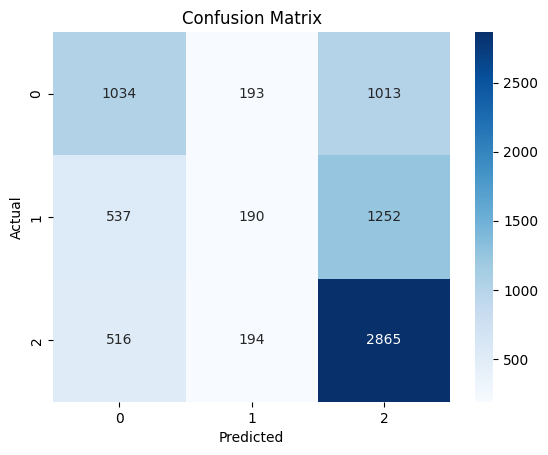

In [21]:
print_cm(y_test,y_pred_lgbm)

In [22]:
calculate_performance_metrics(y_test,y_pred_lgbm)

Accuracy: 0.5246343341031563
Precision: 0.48216982953653514
Recall: 0.5246343341031563
F1 Score: 0.4770330587143746


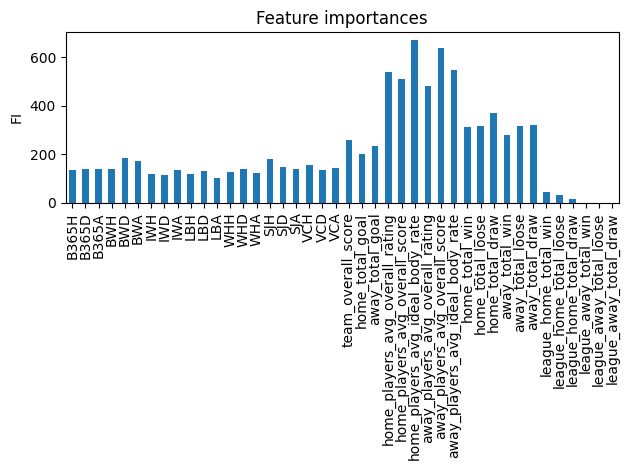

In [23]:
feature_importance(lgbm_classifier)

## Checking Random Forest

In [24]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# predicting using LGBM model
y_pred_rf = rf.predict(X_test)

In [25]:
# checking for the accuracy
rf.score(X_test,y_test)

0.5076982294072363

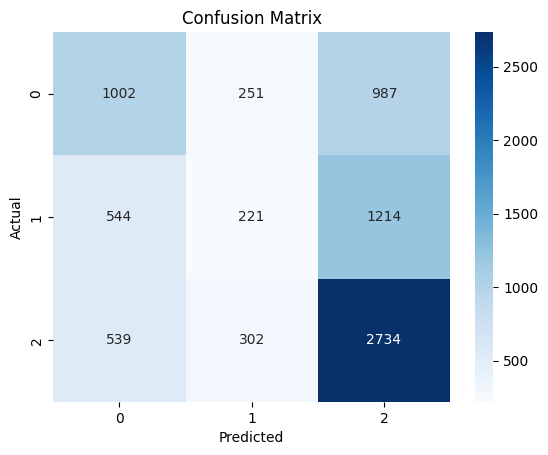

In [26]:
print_cm(y_test,y_pred_rf)

In [27]:
calculate_performance_metrics(y_test,y_pred_rf)

Accuracy: 0.5076982294072363
Precision: 0.46473053121643565
Recall: 0.5076982294072363
F1 Score: 0.4686574945377252


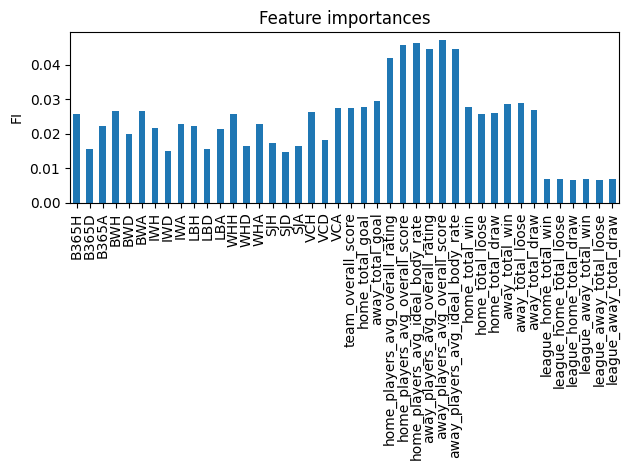

In [28]:
feature_importance(rf)

## Checking Logistic Regression

In [29]:
# checking using randomforest
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train,y_train)

# predicting using LGBM model
y_pred_lr = lr.predict(X_test)

In [30]:
# checking for the accuracy
lr.score(X_test,y_test)

0.5409289196818066

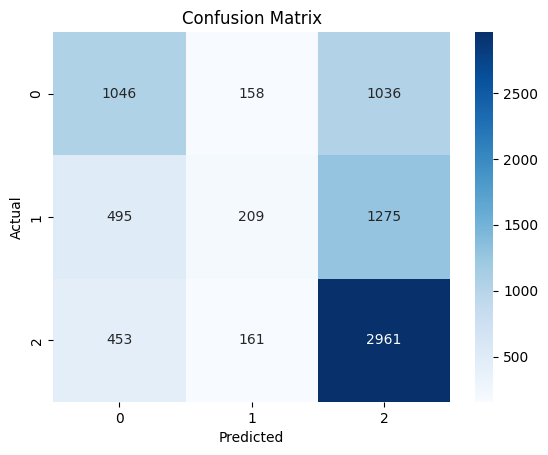

In [31]:
print_cm(y_test,y_pred_lr)

In [32]:
calculate_performance_metrics(y_test,y_pred_lr)

Accuracy: 0.5409289196818066
Precision: 0.5088895693598071
Recall: 0.5409289196818066
F1 Score: 0.49137415586582


## Checking Decision Classifier

In [33]:
# checking using randomforest
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# predicting using LGBM model
y_pred_dt = dt.predict(X_test)

In [34]:
# checking for the accuracy
dt.score(X_test,y_test)

0.41159866564023606

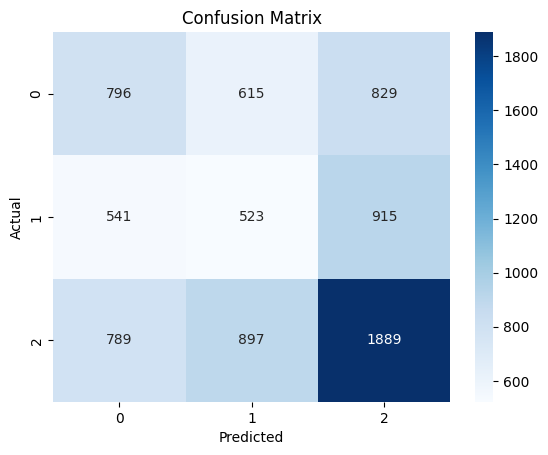

In [35]:
print_cm(y_test,y_pred_dt)

In [36]:
calculate_performance_metrics(y_test,y_pred_dt)

Accuracy: 0.41159866564023606
Precision: 0.4113591723748228
Recall: 0.41159866564023606
F1 Score: 0.4113789740817844


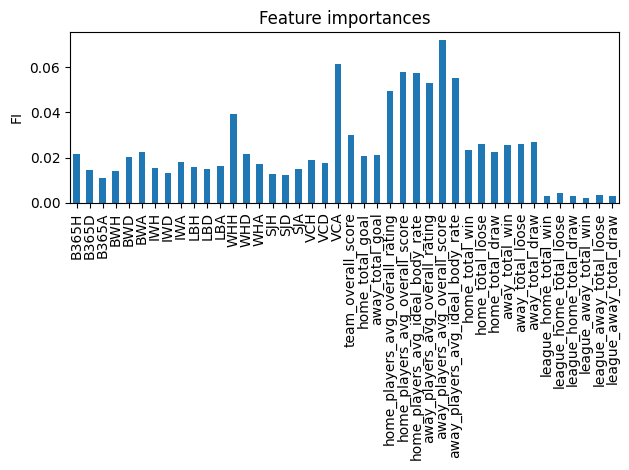

In [37]:
feature_importance(dt)

## Checking Naive Bays

In [38]:
# checking using randomforest
nb = GaussianNB()
nb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_nb = nb.predict(X_test)

In [39]:
# checking for the accuracy
nb.score(X_test,y_test)

0.39992301770592764

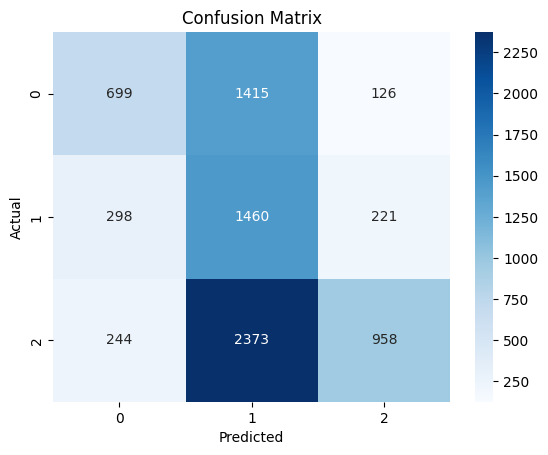

In [40]:
print_cm(y_test,y_pred_nb)

In [41]:
calculate_performance_metrics(y_test,y_pred_nb)

Accuracy: 0.39992301770592764
Precision: 0.5692402524256657
Recall: 0.39992301770592764
F1 Score: 0.3981045125700614


## Checking SVC

In [42]:
# checking using randomforest
svc = SVC()
svc.fit(X_train,y_train)

# predicting using LGBM model
y_pred_svc = svc.predict(X_test)

In [43]:
# checking for the accuracy
svc.score(X_test,y_test)

0.5307929176289453

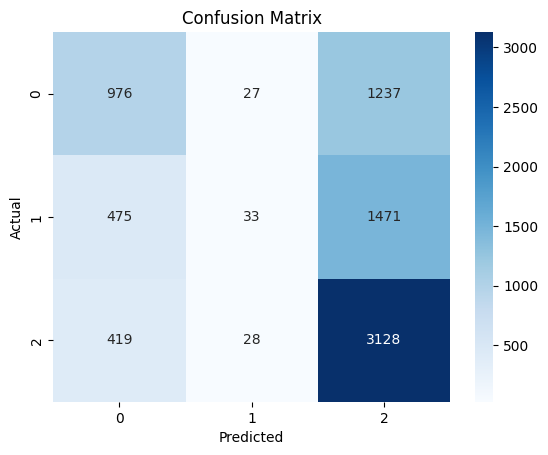

In [44]:
print_cm(y_test,y_pred_svc)

In [45]:
calculate_performance_metrics(y_test,y_pred_svc)

Accuracy: 0.5307929176289453
Precision: 0.49106729433704266
Recall: 0.5307929176289453
F1 Score: 0.44951879238509623


## Checking XGB

In [46]:
# checking using randomforest
xb = xgb.XGBClassifier()
xb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_xb = xb.predict(X_test)

In [47]:
# checking for the accuracy
xb.score(X_test,y_test)

0.5118039517577624

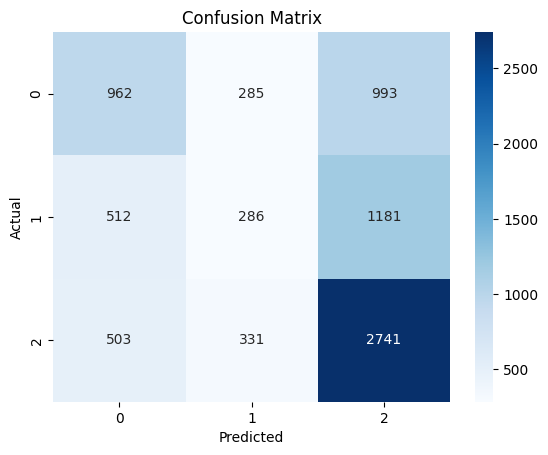

In [48]:
print_cm(y_test,y_pred_xb)

In [49]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5118039517577624
Precision: 0.47615737113881423
Recall: 0.5118039517577624
F1 Score: 0.47771261069707965


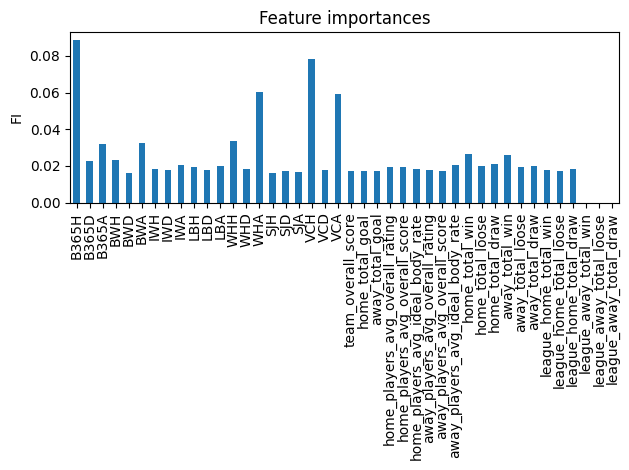

In [50]:
feature_importance(xb)

## Neural Network Model (Test)

In [51]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [52]:
# Create an instance of the OneHotEncoder
oh = OneHotEncoder()

# Fit and transform the categorical data
oh_encoded = oh.fit_transform(y_train.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded = oh_encoded.toarray()

# Fit and transform the categorical data
oh_encoded_test = oh.fit_transform(y_test.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded_test = oh_encoded_test.toarray()

In [69]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(518, activation='relu', input_shape=(42,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 518)               22274     
                                                                 
 dropout_6 (Dropout)         (None, 518)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               132864    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 24)               

In [71]:
# Compile the model
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
# Train the model
model.fit(X_train, oh_encoded, epochs=50, batch_size=12)

Epoch 1/50
1516/1516 [==============================] - 5s 2ms/step - loss: 0.9875 - accuracy: 0.5259
Epoch 2/50
1516/1516 [==============================] - 3s 2ms/step - loss: 0.9744 - accuracy: 0.5332
Epoch 3/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.9709 - accuracy: 0.5373
Epoch 4/50
1516/1516 [==============================] - 3s 2ms/step - loss: 0.9705 - accuracy: 0.5348
Epoch 5/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.9688 - accuracy: 0.5381
Epoch 6/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.9655 - accuracy: 0.5401
Epoch 7/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.9637 - accuracy: 0.5402
Epoch 8/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.9630 - accuracy: 0.5412
Epoch 9/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.9617 - accuracy: 0.5451
Epoch 10/50
1516/1516 [==============================] - 4s 2ms/step - loss: 0.961

In [73]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, oh_encoded_test)

244/244 [==============================] - 0s 1ms/step - loss: 1.0459 - accuracy: 0.5131


In [74]:
# Make predictions
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

244/244 [==============================] - 0s 1ms/step


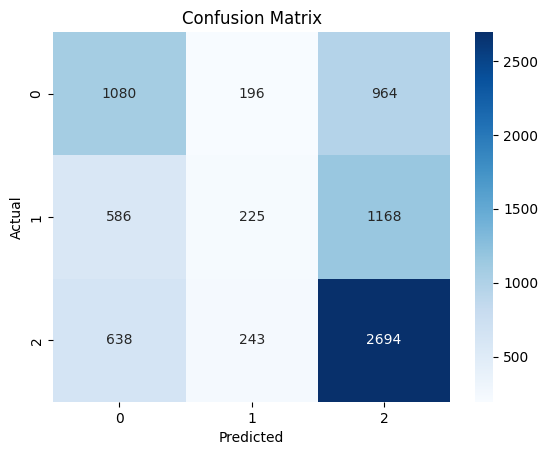

In [75]:
print_cm(y_test,predicted_labels)

In [76]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5118039517577624
Precision: 0.47615737113881423
Recall: 0.5118039517577624
F1 Score: 0.47771261069707965


In [81]:
model.save('./final_model/')

INFO:tensorflow:Assets written to: ./final_model/assets


INFO:tensorflow:Assets written to: ./final_model/assets
